In [5]:
# ==============================================================================
# 1. INSTALL LIBRARIES
# ==============================================================================
# This command uses pip to install the required libraries from the Hugging Face ecosystem,
# along with PyTorch for deep learning and Pillow for image handling.
# The '!' prefix allows you to run shell commands directly from a notebook cell.
!pip install --upgrade transformers torch torchvision pillow

# ==============================================================================
# 2. IMPORT LIBRARIES
# ==============================================================================
import torch
import glob
from PIL import Image
from transformers import CLIPModel, CLIPProcessor
import pandas as pd
import matplotlib.pyplot as plt

# ==============================================================================
# 3. SET UP THE MODEL AND CONFIGURATION
# ==============================================================================
# --- Configuration ---
# You can change this ID to use other TinyCLIP models from the Hugging Face Hub if needed.
#MODEL_ID = "wkcn/TinyCLIP-ViT-61M-32-Text-29M-LAION400M"
MODEL_ID = "wkcn/TinyCLIP-ViT-8M-16-Text-3M-YFCC15M"

# --- Device Selection ---
# This code automatically selects the best available hardware for running the model.
# It prioritises an NVIDIA GPU ('cuda') if available, otherwise falls back to the CPU.
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")

# --- Load Model and Processor ---
# CLIPProcessor handles the preprocessing of images and text to the format the model expects.
processor = CLIPProcessor.from_pretrained(MODEL_ID)
# CLIPModel is the actual neural network model.
model = CLIPModel.from_pretrained(MODEL_ID)
# Move the model to the selected device (GPU or CPU).
model.to(DEVICE)
# Set the model to evaluation mode, which disables training-specific layers like dropout.
model.eval()

print(f"Model '{MODEL_ID}' loaded and ready.")

# ==============================================================================
# 4. DEFINE CORE FUNCTIONS
# ==============================================================================

def score_image_against_prompts(image_path, prompts):
    """
    Opens an image, runs it through the CLIP model against a list of text prompts,
    and returns the probabilities for each prompt.
    """
    # Open the image file using the Pillow library and ensure it's in RGB format.
    image = Image.open(image_path).convert("RGB")
    
    # Preprocess the text and image. This creates tensors that the model can understand.
    inputs = processor(text=prompts, images=image, return_tensors="pt", padding=True)
    
    # Move the input tensors to the selected device (GPU or CPU).
    inputs = {k: v.to(DEVICE) for k, v in inputs.items()}

    # Perform inference without calculating gradients to save memory and computation.
    with torch.no_grad():
        # Pass the inputs to the model.
        outputs = model(**inputs)
        # The logits_per_image tensor contains the raw similarity scores.
        logits_per_image = outputs.logits_per_image
        # The softmax function converts these raw scores into probabilities that sum to 1.
        probs = logits_per_image.softmax(dim=1).squeeze().cpu().numpy()
        
    return image, probs

def display_image_and_scores(image, prompts, probs, title):
    """
    Displays the image and a table of its scores in the notebook.
    """
    # Use Matplotlib to show the image.
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()
    
    # Use Pandas to create and display a clean, sorted table of the results.
    df = pd.DataFrame({"Prompt": prompts, "Probability": probs})
    df = df.sort_values("Probability", ascending=False).reset_index(drop=True)
    display(df)

# ==============================================================================
# 5. RUN THE ANALYSIS
# ==============================================================================

# --- IMPORTANT: EDIT THESE TWO VARIABLES ---

# Use a glob pattern to find all images in a folder.
# The `r` prefix is important on Windows to handle backslashes correctly.
# The `**` part means it will search in subdirectories as well.
# 🦊 EXAMPLE: To find all .jpg files in a folder named 'fox_pics' on your C: drive:
IMAGE_GLOB = r"C:\Users\YourUsername\Desktop\fox_pics\**\*.jpg"

# Define the list of text descriptions (prompts) you want to compare against.
PROMPTS = [
    "a photograph of a fox",
    "a photograph of a dog",
    "a person walking",
    "an empty garden at night",
    "a car"
]

# --- Main Execution Logic ---
# Find all file paths that match the glob pattern.
image_paths = glob.glob(IMAGE_GLOB, recursive=True)

if not image_paths:
    print(f"⚠️ Warning: No images found for the path: {IMAGE_GLOB}")
    print("Please check that the folder path and file extension are correct.")
else:
    print(f"Found {len(image_paths)} images to process...")
    # Loop through each image path, score it, and display the results.
    for path in image_paths:
        try:
            img, probabilities = score_image_against_prompts(path, PROMPTS)
            display_image_and_scores(img, PROMPTS, probabilities, title=path)
        except Exception as e:
            print(f"Could not process image {path}. Error: {e}")

Using device: cpu
Model 'wkcn/TinyCLIP-ViT-8M-16-Text-3M-YFCC15M' loaded and ready.
⚠️ Warning: No images found for the path: C:\Users\YourUsername\Desktop\fox_pics\**\*.jpg
Please check that the folder path and file extension are correct.


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.5 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


Setting up AI model...
Using device: cpu
Model 'wkcn/TinyCLIP-ViT-8M-16-Text-3M-YFCC15M' loaded and ready.

Scanning for JPEG images in: motion_events/*


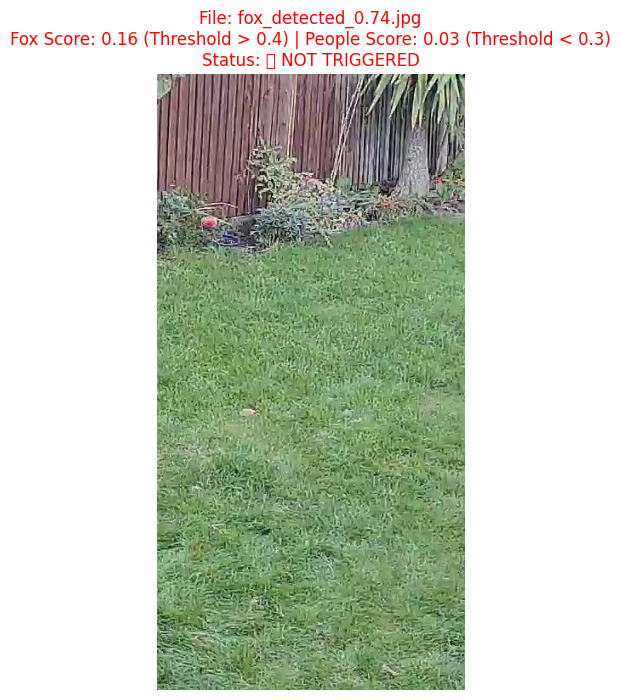

man 0.011042111553251743
woman 0.00463909050449729
a person walking 0.0022062836214900017
a photograph of a person 0.008477462455630302
people 0.004451755899935961
person wearing a jumper 0.0016134358011186123
a photograph of a fox 0.1584591120481491
a photograph of a dog 0.028858868405222893
an empty garden at night 0.0011500450782477856
a car 0.0010342546738684177
grass 0.6528816223144531
empty 0.02394282817840576
nothing 0.006686103064566851
plants 0.013275756500661373
blurry image of nothing 0.06207134947180748
a photograph of a cat 0.019209928810596466


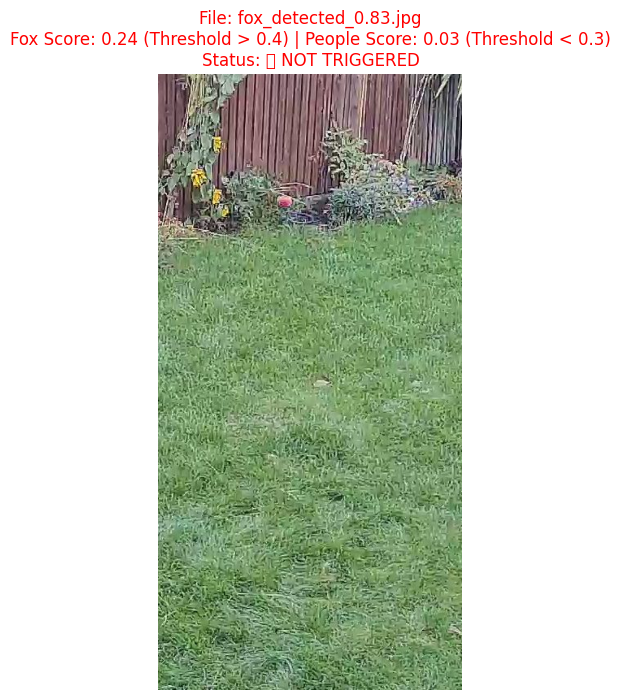

man 0.011653861962258816
woman 0.00495677487924695
a person walking 0.0021631037816405296
a photograph of a person 0.007110816892236471
people 0.004373904783278704
person wearing a jumper 0.0024312937166541815
a photograph of a fox 0.2444523125886917
a photograph of a dog 0.018323644995689392
an empty garden at night 0.0008270348771475255
a car 0.0009704648982733488
grass 0.5948822498321533
empty 0.023520128801465034
nothing 0.006793683860450983
plants 0.013011141680181026
blurry image of nothing 0.03539298474788666
a photograph of a cat 0.029136529192328453


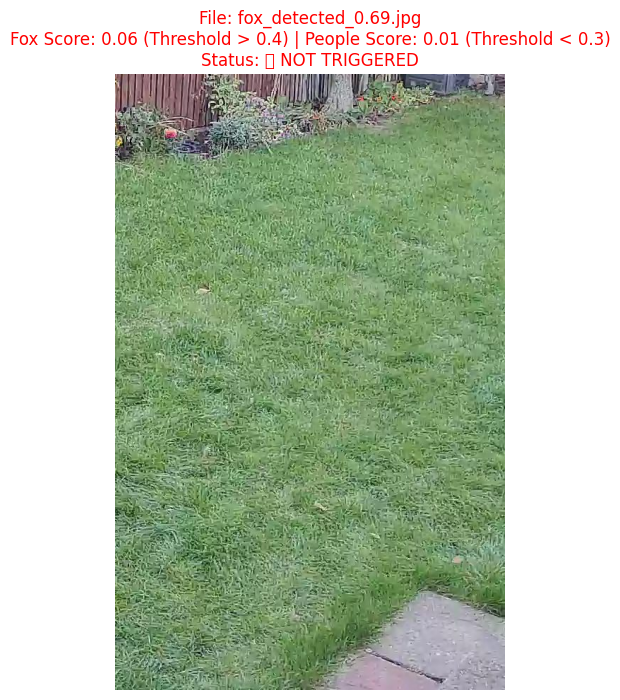

man 0.003785989247262478
woman 0.0016402865294367075
a person walking 0.0015134320128709078
a photograph of a person 0.0026391928549855947
people 0.0017195910913869739
person wearing a jumper 0.0007581661338917911
a photograph of a fox 0.056539829820394516
a photograph of a dog 0.011537683196365833
an empty garden at night 0.00051656155847013
a car 0.00043936489964835346
grass 0.872428834438324
empty 0.01207253709435463
nothing 0.0028714470099657774
plants 0.0035674648825079203
blurry image of nothing 0.021208666265010834
a photograph of a cat 0.0067609804682433605
Finished. Total triggers: 0 out of 3 images.


In [13]:
# ==============================================================================
# 1. IMPORTS AND INITIAL SETUP
# ==============================================================================
import os
import glob
import cv2
import torch
import numpy as np
from PIL import Image
from transformers import CLIPModel, CLIPProcessor
import matplotlib.pyplot as plt

# ==============================================================================
# 2. TINYCLIP MODEL SETUP
# ==============================================================================
# --- Configuration ---
MODEL_ID = "wkcn/TinyCLIP-ViT-8M-16-Text-3M-YFCC15M"

# --- Device Selection ---
print("Setting up AI model...")
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")

# --- Load Model and Processor ---
processor = CLIPProcessor.from_pretrained(MODEL_ID)
model = CLIPModel.from_pretrained(MODEL_ID)
model.to(DEVICE)
model.eval()
print(f"Model '{MODEL_ID}' loaded and ready.")

# ==============================================================================
# 3. DETECTION ALGORITHM CONFIGURATION
# ==============================================================================
# --- Prompts ---
n_people_decoys = 6
PROMPTS = [
    "man", "woman", "a person walking", "a photograph of a person",
    "people", "person wearing a jumper", "a photograph of a fox",
    "a photograph of a dog", "an empty garden at night", "a car", 'grass', 'empty', 'nothing', 'plants',
    'blurry image of nothing', 'a photograph of a cat'
]
FOX_PROMPT_INDEX = PROMPTS.index("a photograph of a fox")

# --- Thresholds ---
FOX_SCORE_THRESHOLD = 0.40
PEOPLE_SUM_THRESHOLD = 0.30

# ==============================================================================
# 4. HELPER FUNCTIONS
# ==============================================================================
def score_image_against_prompts(image_frame, prompts):
    """Scores an image (NumPy array) against a list of text prompts."""
    rgb_frame = cv2.cvtColor(image_frame, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(rgb_frame)
    
    inputs = processor(text=prompts, images=image, return_tensors="pt", padding=True)
    inputs = {k: v.to(DEVICE) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1).squeeze().cpu().numpy()
        
    return probs

def display_image_with_results(image_frame, file_path, fox_score, people_score, is_triggered):
    """Displays the image inline with its scores and trigger status in the title."""
    # Convert from OpenCV BGR to Matplotlib RGB for correct color display.
    rgb_image = cv2.cvtColor(image_frame, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    
    # Create the title text with all the relevant information.
    status_text = "✅ TRIGGERED!" if is_triggered else "❌ NOT TRIGGERED"
    title_color = 'green' if is_triggered else 'red'
    
    title = (
        f"File: {os.path.basename(file_path)}\n"
        f"Fox Score: {fox_score:.2f} (Threshold > {FOX_SCORE_THRESHOLD}) | "
        f"People Score: {people_score:.2f} (Threshold < {PEOPLE_SUM_THRESHOLD})\n"
        f"Status: {status_text}"
    )
    
    plt.imshow(rgb_image)
    plt.title(title, color=title_color, fontsize=12)
    plt.axis('off')
    plt.show()

# ==============================================================================
# 5. MAIN EXECUTION LOGIC
# ==============================================================================
def test_images_in_folder(image_folder):
    """Loads images from a folder and runs the detection algorithm on them."""
    print(f"\nScanning for JPEG images in: {image_folder}\n" + "="*50)
    
    image_paths = glob.glob(os.path.join(image_folder, '**', '*.jpg'), recursive=True)
    
    if not image_paths:
        print(f"⚠️ No JPEG images found in '{image_folder}'. Please check the path.")
        return

    triggered_count = 0
    for path in image_paths:
        image_frame = cv2.imread(path)
        if image_frame is None:
            print(f"Could not read image: {path}")
            continue

        probabilities = score_image_against_prompts(image_frame, PROMPTS)
        
        fox_score = probabilities[FOX_PROMPT_INDEX]
        people_scores_sum = np.sum(probabilities[:n_people_decoys])
        
        # Determine if the trigger conditions are met.
        is_triggered = (fox_score > FOX_SCORE_THRESHOLD and 
                        people_scores_sum < PEOPLE_SUM_THRESHOLD)
        
        if is_triggered:
            triggered_count += 1
            
        # Display the image and results inline.
        display_image_with_results(image_frame, path, fox_score, people_scores_sum, is_triggered)

        for thing, prob in zip(PROMPTS, probabilities):
            print(f"{thing} {prob}")
    
    print("="*50 + f"\nFinished. Total triggers: {triggered_count} out of {len(image_paths)} images.")

# ==============================================================================
# 6. RUN THE TEST
# ==============================================================================
if __name__ == '__main__':
    # --- IMPORTANT: EDIT THIS PATH ---
    # Point this to the folder containing your test JPEG images.
    IMAGE_FOLDER_TO_TEST = r"motion_events/*"
    
    test_images_in_folder(IMAGE_FOLDER_TO_TEST)